Technological Institute of the Philippines | Quezon City - Computer Engineering
--- | ---
Course Code: | CPE 019
Code Title: | Emerging Technologies in CpE 2
2nd Semester | AY 2023-2024
<hr> | <hr>
**Assignment 8.1:**| Saving Models
<hr> | <hr>
**Name**         | Naga, Jamal
**Section** | CPE32S3
**Date Performed**: |April 13, 2024
**Date Submitted**: |April 19, 2024
**Instructor**: | Engr. Roman Richard
<hr> | <hr>

### **Dataset**: EEG Eye State - https://archive.ics.uci.edu/dataset/264/eeg+eye+state
### **Description**: The EEG Eye State dataset consists of EEG measurements recorded from a single subject over 1.5 hours. Each sample includes measurements from 14 EEG electrodes and a binary label indicating whether the subject's eyes were open or closed during the recording.
### **Problem being address** - The problem being addressed in the EEG Eye State dataset is the classification of eye states (open or closed) based on EEG measurements.

In [ ]:
pip install ucimlrepo

##Import necessary libraries

In [ ]:
import pandas
import numpy
import os
from tensorflow.keras.models import Sequential, model_from_json
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers,models
from keras.layers import Dense, Dropout
from keras.optimizers import Adam, SGD
from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt

In [ ]:
# Setting the random seed for reproducibility
seed = 7
numpy.random.seed(seed)

## Preparing the data

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
eeg_eye_state = fetch_ucirepo(id=264)

# data (as pandas dataframes)
X = eeg_eye_state.data.features
y = eeg_eye_state.data.targets

# metadata
print(eeg_eye_state.metadata)

# variable information
print(eeg_eye_state.variables)


{'uci_id': 264, 'name': 'EEG Eye State', 'repository_url': 'https://archive.ics.uci.edu/dataset/264/eeg+eye+state', 'data_url': 'https://archive.ics.uci.edu/static/public/264/data.csv', 'abstract': 'The data set consists of 14 EEG values and a value indicating the eye state.', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate', 'Sequential', 'Time-Series'], 'num_instances': 14980, 'num_features': 14, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['eyeDetection'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2013, 'last_updated': 'Thu Mar 21 2024', 'dataset_doi': '10.24432/C57G7J', 'creators': ['Oliver Roesler'], 'intro_paper': None, 'additional_info': {'summary': "All data is from one continuous EEG measurement with the Emotiv EEG Neuroheadset. The duration of the measurement was 117 seconds. The eye state was detected via a camera during the EEG measuremen

## Preprocessing

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14980 entries, 0 to 14979
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AF3     14980 non-null  float64
 1   F7      14980 non-null  float64
 2   F3      14980 non-null  float64
 3   FC5     14980 non-null  float64
 4   T7      14980 non-null  float64
 5   P7      14980 non-null  float64
 6   O1      14980 non-null  float64
 7   O2      14980 non-null  float64
 8   P8      14980 non-null  float64
 9   T8      14980 non-null  float64
 10  FC6     14980 non-null  float64
 11  F4      14980 non-null  float64
 12  F8      14980 non-null  float64
 13  AF4     14980 non-null  float64
dtypes: float64(14)
memory usage: 1.6 MB


In [ ]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14980 entries, 0 to 14979
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   eyeDetection  14980 non-null  int64
dtypes: int64(1)
memory usage: 117.2 KB


In [ ]:
X.head()

,AF3,F7,F3,FC5,T7,P7,O1,O2,P8,T8,FC6,F4,F8,AF4
0,4329.23,4009.23,4289.23,4148.21,4350.26,4586.15,4096.92,4641.03,4222.05,4238.46,4211.28,4280.51,4635.90,4393.85
1,4324.62,4004.62,4293.85,4148.72,4342.05,4586.67,4097.44,4638.97,4210.77,4226.67,4207.69,4279.49,4632.82,4384.10
2,4327.69,4006.67,4295.38,4156.41,4336.92,4583.59,4096.92,4630.26,4207.69,4222.05,4206.67,4282.05,4628.72,4389.23
3,4328.72,4011.79,4296.41,4155.90,4343.59,4582.56,4097.44,4630.77,4217.44,4235.38,4210.77,4287.69,4632.31,4396.41
4,4326.15,4011.79,4292.31,4151.28,4347.69,4586.67,4095.90,4627.69,4210.77,4244.10,4212.82,4288.21,4632.82,4398.46


In [ ]:
X.shape

(14980, 14)

In [ ]:
# Split the data into training, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Standardized the data

In [ ]:
# Scaling the Features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Task 1. Save a model in HDF5 format

In [ ]:
pip install h5py

**Oservation**: After executing the code I observed that this code will mount the Google Drive to the Colab notebook, enabling seamless access to files and folders stored in the user's Google Drive. This allows for easy storage, retrieval, and manipulation of data directly within the Colab environment.

# Task 2. Save a model and load the model in a JSON format

In [ ]:
# create model
model = Sequential()
model.add(Dense(128,  input_dim=14, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Fit the model
model.fit(X_train_scaled, y_train, epochs=50, batch_size=128, verbose=0)
# evaluate the model
scores = model.evaluate(X_train_scaled, y_train, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("json_weights.h5")
print("Saved model weights to disk")

# later...

# load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# Load model weights from the correct file path
loaded_model.load_weights("json_weights.h5")
print("Loaded model weights from disk")

# evaluate loaded model on test data
loaded_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
score = loaded_model.evaluate(X_test_scaled, y_test, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

accuracy: 94.95%
Saved model weights to disk
Loaded model weights from disk
accuracy: 91.92%


**OUTPUT:**

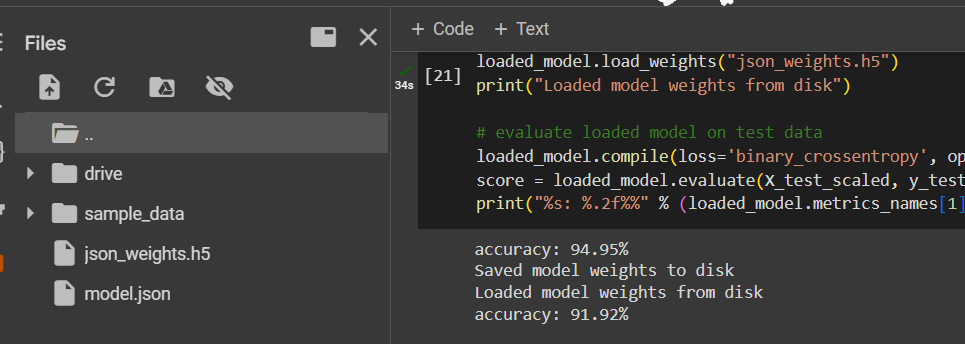

In [ ]:
import json

# Read the contents of the JSON file
with open('model.json', 'r') as json_file:
    model_json_content = json_file.read()

# Parse the JSON content
parsed_model_json = json.loads(model_json_content)

# Print the parsed JSON content with indentation
print(json.dumps(parsed_model_json, indent=4))

{
    "class_name": "Sequential",
    "config": {
        "name": "sequential_1",
        "layers": [
            {
                "module": "keras.layers",
                "class_name": "InputLayer",
                "config": {
                    "batch_input_shape": [
                        null,
                        14
                    ],
                    "dtype": "float32",
                    "sparse": false,
                    "ragged": false,
                    "name": "dense_6_input"
                },
                "registered_name": null
            },
            {
                "module": "keras.layers",
                "class_name": "Dense",
                "config": {
                    "name": "dense_6",
                    "trainable": true,
                    "dtype": "float32",
                    "batch_input_shape": [
                        null,
                        14
                    ],
                    "units": 128,
                 

**Observation**: The JSON file serves as a blueprint for recreating the model architecture, while the HDF5 file stores the learned weights of the model. Together, they allow you to save and load the entire model for future use. After executing the code, my model achieved a high accuracy of 94.95% during training and saving, indicating good performance on the training data. However, when the model was loaded and evaluated on test data, the accuracy slightly decreased to 91.92%, suggesting a small drop in performance but still demonstrating good generalization ability.

#Task 3. Save a model and load the model in a YAML format

In [ ]:
# create model
model = Sequential()
model.add(Dense(128,  input_dim=14, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Fit the model
model.fit(X_train_scaled, y_train, epochs=50, batch_size=128, verbose=0)
# evaluate the model
scores = model.evaluate(X_train_scaled, y_train, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

# serialize model to YAML
model_yaml = model.to_json()
with open("model.yaml", "w") as yaml_file:
    yaml_file.write(model_yaml)
# serialize weights to HDF5
model.save_weights("yaml_weights.h5")
print("Saved model to disk")

# later...

# load YAML and create model
yaml_file = open('model.yaml', 'r')
loaded_model_yaml = yaml_file.read()
yaml_file.close()
loaded_model = model_from_json(loaded_model_yaml)

# Load model weights from the correct file path
loaded_model.load_weights("yaml_weights.h5")
print("Loaded model weights from disk")

# evaluate loaded model on test data
loaded_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
score = loaded_model.evaluate(X_test_scaled, y_test, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

accuracy: 96.00%
Saved model to disk
Loaded model weights from disk
accuracy: 92.72%


**OUTPUT:**

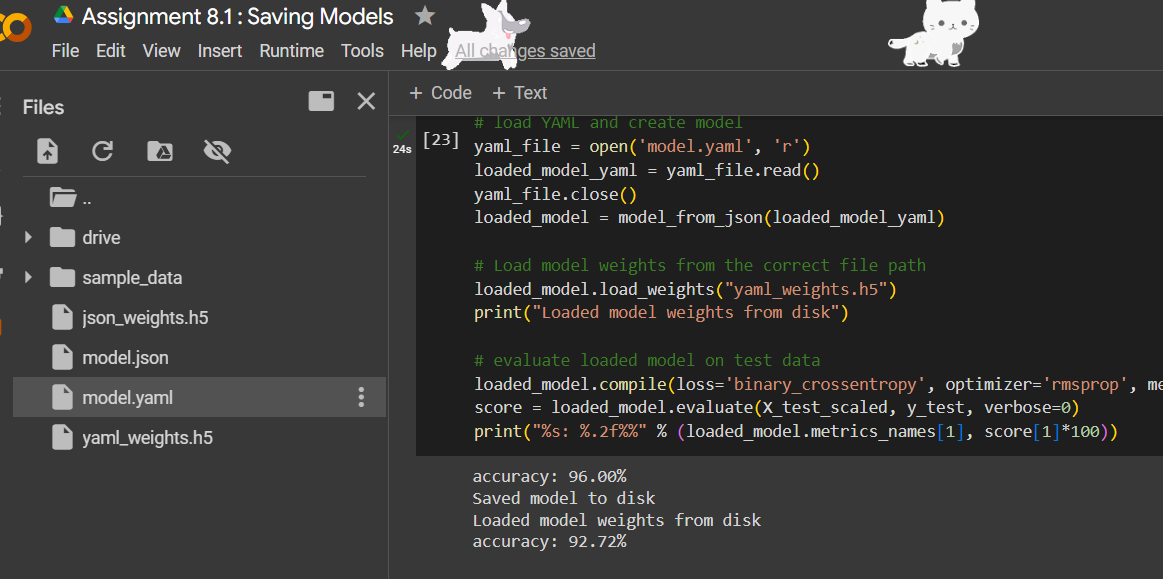

In [ ]:
import yaml

# Read the contents of the YAML file
with open('model.yaml', 'r') as yaml_file:
    model_yaml_content = yaml.safe_load(yaml_file)

# Print the parsed YAML content with indentation
print(yaml.dump(model_yaml_content, indent=4))

backend: tensorflow
class_name: Sequential
config:
    layers:
    -   class_name: InputLayer
        config:
            batch_input_shape:
            - null
            - 14
            dtype: float32
            name: dense_12_input
            ragged: false
            sparse: false
        module: keras.layers
        registered_name: null
    -   build_config:
            input_shape:
            - null
            - 14
        class_name: Dense
        config:
            activation: relu
            activity_regularizer: null
            batch_input_shape:
            - null
            - 14
            bias_constraint: null
            bias_initializer:
                class_name: Zeros
                config: {}
                module: keras.initializers
                registered_name: null
            bias_regularizer: null
            dtype: float32
            kernel_constraint: null
            kernel_initializer:
                class_name: GlorotUniform
              

**OUTPUT:**

**Observation:** After executing the code, model architecture save to a YAML file and the weights to an HDF5 file where later, it loads the model architecture and weights, evaluates the loaded model on test data, and prints the test accuracy. The model achieved an accuracy of 96.00% during training and saving. However, when the model was loaded and evaluated on test data, the accuracy slightly decreased to 92.72%.

# Task 4. Checkpoint Neural Network Model Improvements

In [ ]:
# create model
model = Sequential()
model.add(Dense(128,  input_dim=14, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# checkpoint
filepath="weights-improvement-{epoch:02d}-{val_accuracy:.2f}.keras"  # Change .hdf5 to .keras
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

# Fit the model
model.fit(X_train_scaled, y_train, validation_split=0.33, epochs=50, batch_size=128, callbacks=callbacks_list, verbose=0)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Epoch 1: val_accuracy improved from -inf to 0.56106, saving model to weights-improvement-01-0.56.keras

Epoch 2: val_accuracy improved from 0.56106 to 0.71454, saving model to weights-improvement-02-0.71.keras

Epoch 3: val_accuracy improved from 0.71454 to 0.78078, saving model to weights-improvement-03-0.78.keras

Epoch 4: val_accuracy improved from 0.78078 to 0.80582, saving model to weights-improvement-04-0.81.keras

Epoch 5: val_accuracy improved from 0.80582 to 0.83085, saving model to weights-improvement-05-0.83.keras

Epoch 6: val_accuracy improved from 0.83085 to 0.84172, saving model to weights-improvement-06-0.84.keras

Epoch 7: val_accuracy improved from 0.84172 to 0.84678, saving model to weights-improvement-07-0.85.keras

Epoch 8: val_accuracy improved from 0.84678 to 0.84981, saving model to weights-improvement-08-0.85.keras

Epoch 9: val_accuracy improved from 0.84981 to 0.86169, saving model to weights-improvement-09-0.86.keras

Epoch 10: val_accuracy improved from 0.

**OUTPUT:**

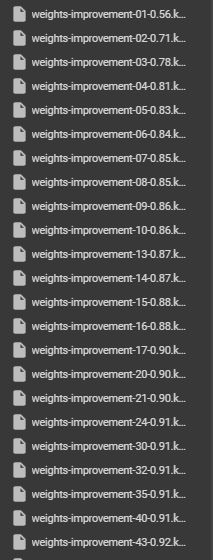

**Observation:** Here I encountered an error in checkpoint part instead of using .hdf5 I used .keras. It sets up a model checkpoint to save the best-performing model weights based on validation accuracy during training as seen in the image above.






# Task 5. Checkpoint Best Neural Network Model only

In [ ]:
# create model
model = Sequential()
model.add(Dense(128,  input_dim=14, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# checkpoint
filepath="weights.best.keras"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]
# Fit the model
model.fit(X_train_scaled, y_train, validation_split=0.33, epochs=50, batch_size=128, callbacks=callbacks_list, verbose=0)


Epoch 1: val_accuracy improved from -inf to 0.61922, saving model to weights.best.keras

Epoch 2: val_accuracy improved from 0.61922 to 0.74286, saving model to weights.best.keras

Epoch 3: val_accuracy improved from 0.74286 to 0.79216, saving model to weights.best.keras

Epoch 4: val_accuracy improved from 0.79216 to 0.81820, saving model to weights.best.keras

Epoch 5: val_accuracy improved from 0.81820 to 0.82908, saving model to weights.best.keras

Epoch 6: val_accuracy improved from 0.82908 to 0.84020, saving model to weights.best.keras

Epoch 7: val_accuracy improved from 0.84020 to 0.84652, saving model to weights.best.keras

Epoch 8: val_accuracy improved from 0.84652 to 0.85638, saving model to weights.best.keras

Epoch 9: val_accuracy did not improve from 0.85638

Epoch 10: val_accuracy improved from 0.85638 to 0.87459, saving model to weights.best.keras

Epoch 11: val_accuracy did not improve from 0.87459

Epoch 12: val_accuracy improved from 0.87459 to 0.88369, saving mode

**OUTPUT:**

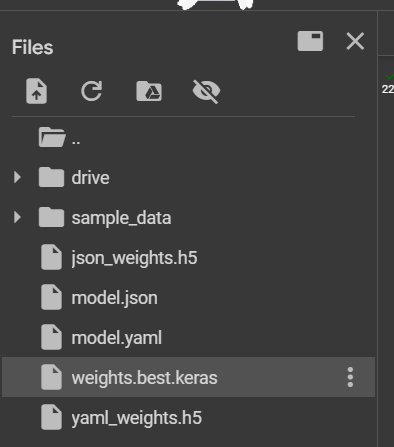

**Observation**: Here I encountered an error in loading the weights instead of using .hdf5 I used .keras. After changing it keras I execute the file and then it prints the accuracy of my model and it created a model and loaded weights from file named weights.best.keras.

# Task 6. Load a saved Neural Network model

In [ ]:
# create model
model = Sequential()
model.add(Dense(128,  input_dim=14, kernel_initializer= 'uniform' , activation='relu'))
model.add(Dense(64, kernel_initializer= 'uniform' , activation='relu'))
model.add(Dense(32, kernel_initializer= 'uniform' , activation='relu'))
model.add(Dense(16, kernel_initializer= 'uniform' , activation='relu'))
model.add(Dense(8, kernel_initializer= 'uniform' , activation='relu'))
model.add(Dense(1, kernel_initializer= 'uniform' , activation='sigmoid'))

# load weights
model.load_weights("weights.best.keras")
# Compile model (required to make predictions)
model.compile(loss= 'binary_crossentropy' , optimizer= 'adam' , metrics=[ 'accuracy' ])
print("Created model and loaded weights from file")

# estimate accuracy on whole dataset using loaded weights
scores = model.evaluate(X_test_scaled, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Created model and loaded weights from file
Accuracy: 91.19%


**Observation**: The output indicates that the model was successfully created, and weights were loaded from the specified file. Additionally, achieving an accuracy of 91.19% on the test dataset suggests that the loaded weights are effective in making accurate predictions, demonstrating the robustness of the trained model.

#Task 7. Visualize Model Training History in Keras

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


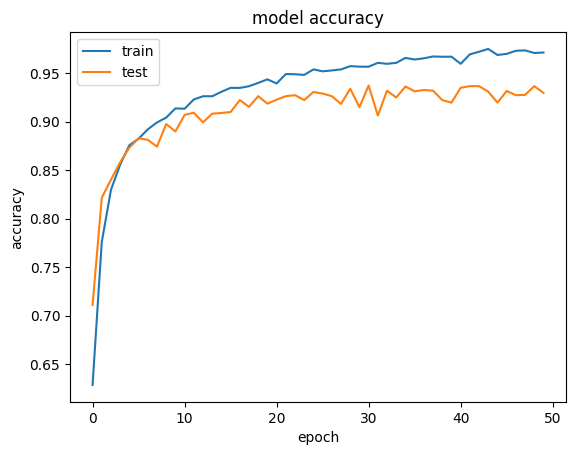

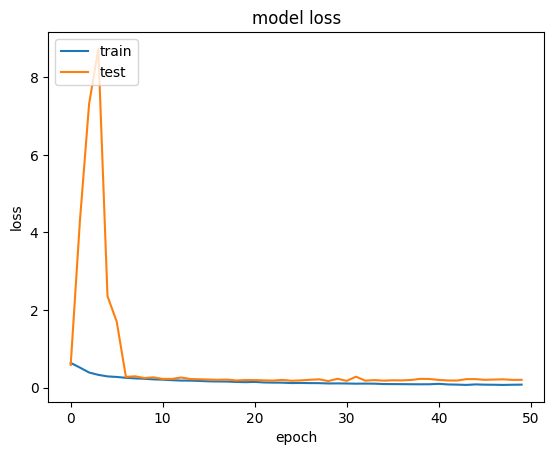

In [ ]:
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Fit the model with validation data
history = model.fit(X_train_scaled, y_train, validation_data=(X_test_scaled, y_test), epochs=50, batch_size=128, verbose=0)


# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**Evaluation:** The output shows that the model accuracy goes up where my train accuracy peaked at approximately 95% percent and also my test accuracy. However, there's evidence of about 3% overfitting based on the difference between train and test losses. Initially, from epochs 0 to 7, the test loss rises, indicating some divergence from the training data. However, by the 8th epoch, it aligns closely with the train loss. Despite this slight overfitting, I can confidently assert that my model's performance has improved.

# Task 8. Show the application of Dropout Regularization

Install Dropout Regularization in Keras

In [ ]:
!pip install scikeras

# Task 9. Show the application of Dropout on the visible layer


In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
eeg_eye_state = fetch_ucirepo(id=264)

# data (as pandas dataframes)
X = eeg_eye_state.data.features
y = eeg_eye_state.data.targets

# create model
model = Sequential()
model.add(Dropout(0.2, input_dim=14))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile model
# Create optimizer with adjusted parameters
sgd = SGD(learning_rate=0.01, momentum=0.9)
model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])
# Fit the model with validation data
history=model.fit(X_train_scaled, y_train,validation_data=(X_test_scaled, y_test), epochs=60, batch_size=32, verbose=0)

# Evaluate model on training data
train_loss, train_accuracy = model.evaluate(X_train_scaled, y_train, verbose=0)

# Evaluate model on test data
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test, verbose=0)

# Print the training and test losses and accuracy
print("Train Accuracy:", train_accuracy)
print("train Loss:", train_loss)

print("Test Accuracy:", test_accuracy)
print("Test Loss:", test_loss)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/regularization/dropout.py:42: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Train Accuracy: 0.8677403330802917
train Loss: 0.33526280522346497
Test Accuracy: 0.8437917232513428
Test Loss: 0.3661368787288666


dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


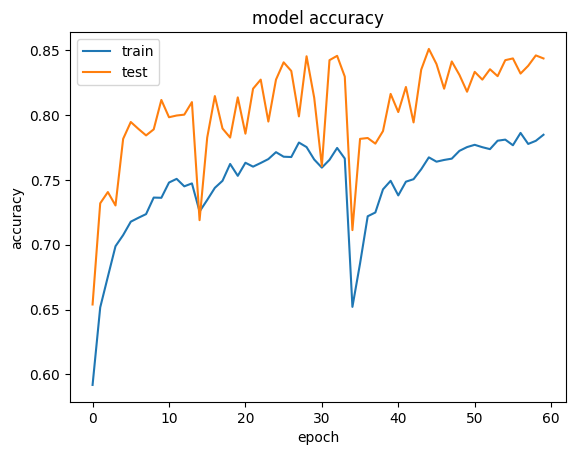

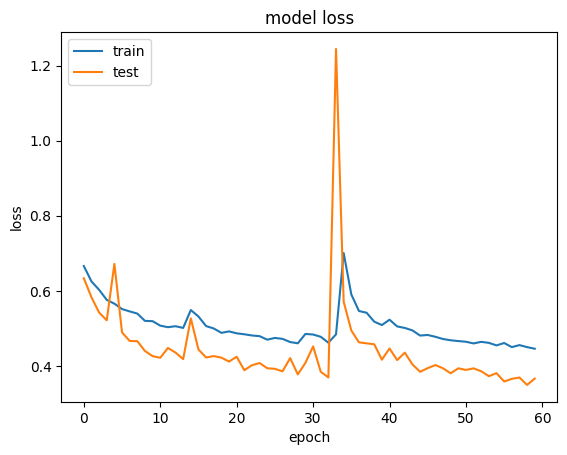

In [ ]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**Evaluation:** Upon applying regularization (Dropout) at the visibble layer my model seems performs slightly better on the training data compared to the test data, as evidenced by the higher accuracy and lower loss on the training set. This suggests some degree of overfitting, where the model may be fitting too closely to the training data and not generalizing well to unseen data. However, the performance on the test data is still relatively high, indicating that the model has learned meaningful patterns and performs reasonably well on new data.

# Task 10. Show the application of Dropout on the hidden layer

In [ ]:
from ucimlrepo import fetch_ucirepo
# fetch dataset
eeg_eye_state = fetch_ucirepo(id=264)

# data (as pandas dataframes)
X = eeg_eye_state.data.features
y = eeg_eye_state.data.targets

# Split the data into training, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
# Scaling the Features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# create model
model = Sequential()
model.add(Dense(128, input_dim=14, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

# Compile model
# Create optimizer with adjusted parameters
sgd = SGD(learning_rate=0.01,  momentum=0.9)
model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])
# Fit the model with validation data
history=model.fit(X_train_scaled, y_train,validation_data=(X_test_scaled, y_test), epochs=60, batch_size=32, verbose=0)

# Evaluate model on training data
train_loss, train_accuracy = model.evaluate(X_train_scaled, y_train, verbose=0)

# Evaluate model on test data
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test, verbose=0)

# Print the training and test losses and accuracy
print("Train Accuracy:", train_accuracy)
print("train Loss:", train_loss)

print("Test Accuracy:", test_accuracy)
print("Test Loss:", test_loss)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Train Accuracy: 0.932076096534729
train Loss: 0.17014572024345398
Test Accuracy: 0.9045394062995911
Test Loss: 0.21876181662082672


dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


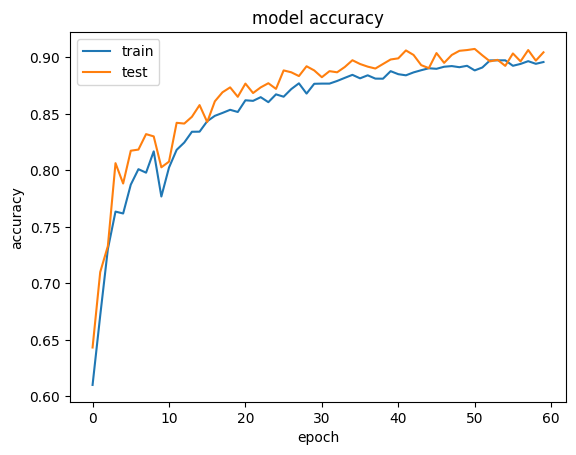

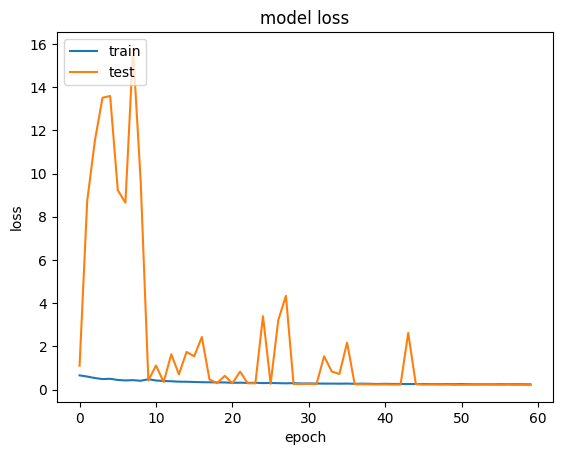

In [ ]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**Evaluation:** Upon applying regularization (dropout) at the hidden layer my model performs well on both the training and test datasets as seen at my plot. The high accuracy and relatively low loss values on both sets suggest that the model has learned meaningful patterns and generalizes well to unseen data. There's a slight difference between the training and test performance, which is normal, but it's not significant, indicating that the model is not overfitting excessively.

# Task 11. Show the application of a time-based learning rate schedule

In [ ]:
from ucimlrepo import fetch_ucirepo

# Fetch dataset
eeg_eye_state = fetch_ucirepo(id=264)
X = eeg_eye_state.data.features
y = eeg_eye_state.data.targets

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Scaling the Features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# create model
model = Sequential()
model.add(Dense(128, input_dim=14, activation='relu'))
model.add(Dropout(0.2))  # Dropout for regularization
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))  # Dropout for regularization
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile model
learning_rate = 0.01
decay_rate = learning_rate / 60  # Assuming 50 epochs

# Create optimizer with adjusted parameters
sgd = SGD(learning_rate=learning_rate, decay=decay_rate, momentum=0.9, nesterov=False)
model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])

# Fit the model
history_1 = model.fit(X_train_scaled, y_train,validation_data = (X_test_scaled, y_test), epochs=60, batch_size=32, verbose=2)

# Evaluate model on training data
train_loss, train_accuracy = model.evaluate(X_train_scaled, y_train, verbose=0)

# Evaluate model on test data
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test, verbose=0)

# Print the training and test losses and accuracy
print("Train Accuracy:", train_accuracy)
print("train Loss:", train_loss)

print("Test Accuracy:", test_accuracy)
print("Test Loss:", test_loss)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/base_optimizer.py:34: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


Epoch 1/60
375/375 - 6s - 15ms/step - accuracy: 0.5537 - loss: 0.6837 - val_accuracy: 0.5664 - val_loss: 1.1084
Epoch 2/60
375/375 - 3s - 7ms/step - accuracy: 0.6210 - loss: 0.6442 - val_accuracy: 0.6812 - val_loss: 3.6999
Epoch 3/60
375/375 - 1s - 3ms/step - accuracy: 0.6918 - loss: 0.5889 - val_accuracy: 0.6759 - val_loss: 0.6182
Epoch 4/60
375/375 - 1s - 2ms/step - accuracy: 0.7279 - loss: 0.5477 - val_accuracy: 0.7911 - val_loss: 0.4959
Epoch 5/60
375/375 - 1s - 2ms/step - accuracy: 0.7747 - loss: 0.4762 - val_accuracy: 0.8128 - val_loss: 0.4150
Epoch 6/60
375/375 - 1s - 2ms/step - accuracy: 0.7958 - loss: 0.4395 - val_accuracy: 0.8171 - val_loss: 0.3962
Epoch 7/60
375/375 - 1s - 3ms/step - accuracy: 0.8089 - loss: 0.4181 - val_accuracy: 0.8284 - val_loss: 0.3815
Epoch 8/60
375/375 - 1s - 2ms/step - accuracy: 0.8169 - loss: 0.4052 - val_accuracy: 0.8184 - val_loss: 0.3840
Epoch 9/60
375/375 - 1s - 3ms/step - accuracy: 0.8244 - loss: 0.3865 - val_accuracy: 0.8538 - val_loss: 0.3474


dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


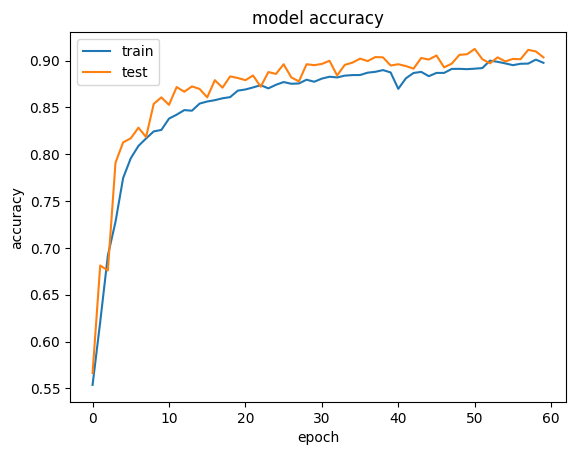

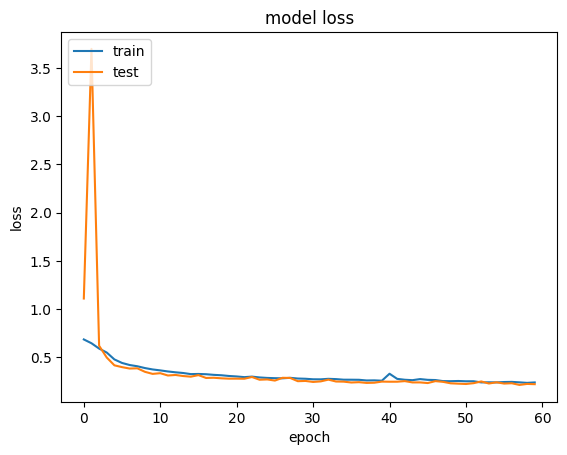

In [ ]:
# list all data in history
print(history_1.history.keys())
# summarize history for accuracy
plt.plot(history_1.history['accuracy'])
plt.plot(history_1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history_1.history['loss'])
plt.plot(history_1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**Evaluation:** The results above demonstrate that the model achieves high accuracy and relatively low loss on both the training and test datasets. The slight difference between the training and test performance suggests that the model generalizes well to unseen data without overfitting excessively.

The implementation of the time-based learning rate scheduler aids the model in achieving these results. By gradually decreasing the learning rate over the course of training, the scheduler helps the model fine-tune its parameters more effectively and converge towards the optimal solution. As a result, the model's performance improves over time, leading to higher accuracy and lower loss values on both the training and test datasets.







# Task 12. Show the application of a drop-based learning rate schedule

In [ ]:
# Drop-Based Learning Rate Decay
import math
from tensorflow.keras.callbacks import LearningRateScheduler

# learning rate schedule
def step_decay(epoch):
	initial_lrate = 0.1
	drop = 0.5
	epochs_drop = 10.0
	lrate = initial_lrate * math.pow(drop, math.floor((1+epoch)/epochs_drop))
	return lrate

# load dataset

eeg_eye_state = fetch_ucirepo(id=264)
X = eeg_eye_state.data.features
y = eeg_eye_state.data.targets

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Scaling the Features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# create model
model = Sequential()
model = Sequential()
model.add(Dense(128, input_dim=14, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# Compile model
sgd = SGD(learning_rate=0.0, momentum=0.9)
model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])
# learning schedule callback
lrate = LearningRateScheduler(step_decay)
callbacks_list = [lrate]
# Fit the model

history=model.fit(X_train_scaled, y_train,validation_data = (X_test_scaled, y_test), epochs=60, batch_size=32, callbacks=callbacks_list, verbose=2)

Epoch 1/60


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


375/375 - 2s - 6ms/step - accuracy: 0.6071 - loss: 0.6634 - val_accuracy: 0.7039 - val_loss: 0.6278 - learning_rate: 0.1000
Epoch 2/60
375/375 - 1s - 2ms/step - accuracy: 0.6683 - loss: 0.6120 - val_accuracy: 0.6889 - val_loss: 0.5740 - learning_rate: 0.1000
Epoch 3/60
375/375 - 1s - 3ms/step - accuracy: 0.7383 - loss: 0.5367 - val_accuracy: 0.7600 - val_loss: 0.5184 - learning_rate: 0.1000
Epoch 4/60
375/375 - 1s - 2ms/step - accuracy: 0.7856 - loss: 0.4607 - val_accuracy: 0.8168 - val_loss: 0.4057 - learning_rate: 0.1000
Epoch 5/60
375/375 - 1s - 2ms/step - accuracy: 0.8024 - loss: 0.4382 - val_accuracy: 0.8164 - val_loss: 0.4198 - learning_rate: 0.1000
Epoch 6/60
375/375 - 1s - 2ms/step - accuracy: 0.8233 - loss: 0.3941 - val_accuracy: 0.8241 - val_loss: 0.3995 - learning_rate: 0.1000
Epoch 7/60
375/375 - 2s - 4ms/step - accuracy: 0.8173 - loss: 0.3981 - val_accuracy: 0.8348 - val_loss: 0.3540 - learning_rate: 0.1000
Epoch 8/60
375/375 - 1s - 4ms/step - accuracy: 0.8383 - loss: 0.36

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


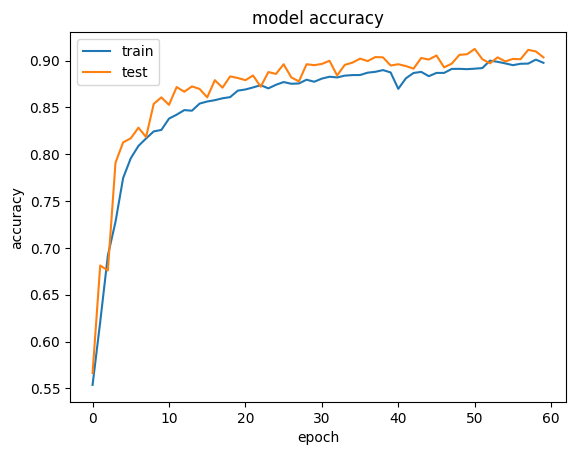

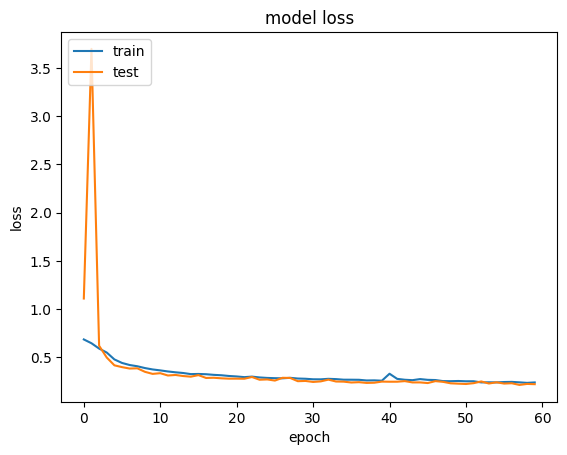

In [ ]:
# list all data in history
print(history_1.history.keys())
# summarize history for accuracy
plt.plot(history_1.history['accuracy'])
plt.plot(history_1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history_1.history['loss'])
plt.plot(history_1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**Evaluation:** Seeing the result above I can say that my model demonstrates exceptional performance on both the training and test datasets. The high accuracy and relatively low loss values indicate that the model has learned to classify eye states accurately.

The drop-based learning rate scheduler contributes significantly to the model's performance improvement. By systematically decreasing the learning rate every ten epochs, the scheduler allows the model to fine-tune its parameters more effectively, helping it converge towards the optimal solution. As a result, the model's accuracy increases, and its loss decreases over the course of training, leading to better performance on both the training and test

# Conclusion

In conclusion, throughout this series of tasks, I've showcased proficiency in fundamental aspects of neural network modeling and training. I successfully saved and loaded models in various formats, implemented model checkpointing to monitor improvements, and visualized training history to analyze performance trends. Furthermore, my application of dropout regularization and learning rate scheduling demonstrates an understanding of techniques to prevent overfitting and optimize model convergence.